## Question 1
### Which factors are the most influential that affect fire frequency?
First, we analyze the frequency of the fire. We get the frequency in each year and month from 2000 to 2022. And then we analyze the enviromental conditions information by dividing it by month to match the fire frequency data on date (year-month). Then we use random forest algo to analyze the most important factors that actually affect the fire frequency. 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./frequency/frequency_data/ca_daily_fire_2000_03252022.csv")

df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)

df['Year-Month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)  # Ensuring two-digit month format

fire_counts = df['Year-Month'].value_counts().sort_index()

fire_counts_df = fire_counts.reset_index()
fire_counts_df.columns = ['Year-Month', 'Fire Count']
fire_counts_df['Year-Month'] = pd.to_datetime(fire_counts_df['Year-Month'], format='%Y-%m')

yearly_fire_counts = df['year'].value_counts().sort_index()

monthly_fire_counts = df['month'].value_counts().sort_index()

monthly_fire_counts

month
1      16554
2      24948
3      23813
4      18216
5      17951
6      39408
7     126065
8     392732
9     298785
10     90692
11     40487
12     27210
Name: count, dtype: int64

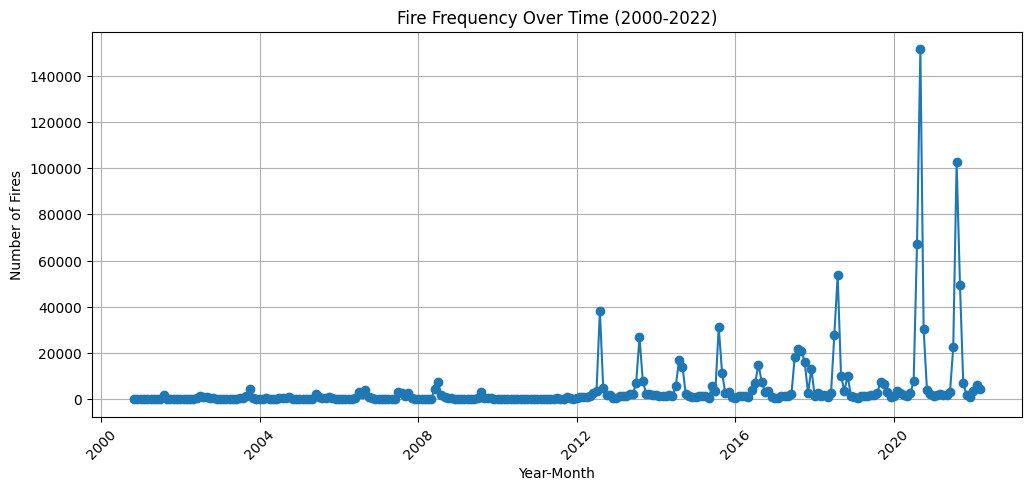

In [2]:
plt.figure(figsize=(12, 5))
plt.plot(fire_counts_df['Year-Month'], fire_counts_df['Fire Count'], marker='o', linestyle='-')
plt.xlabel("Year-Month")
plt.ylabel("Number of Fires")
plt.title("Fire Frequency Over Time (2000-2022)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [3]:
env_df = pd.read_csv("./environmental/all_conditions.csv")
env_df.drop(columns=["Target"], inplace=True)

env_df['Date'] = pd.to_datetime(env_df['Date'], format='%m/%d/%Y')
env_df['Year-Month'] = env_df['Date'].dt.strftime('%Y-%m')
numeric_cols = env_df.select_dtypes(include=['number']).columns
env_monthly = env_df.groupby('Year-Month')[numeric_cols].mean().reset_index()

env_monthly

,Year-Month,Stn Id,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Min Air Temp (F),Avg Air Temp (F),Max Rel Hum (%),Min Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F)
0,2018-01,153.011236,0.056242,0.075451,204.709694,9.269166,63.767808,41.157748,51.476378,87.881631,51.184740,71.797753,41.096969,3.479749,83.513274,52.214842
1,2018-02,152.720303,0.102572,0.012345,343.988206,6.967762,65.493092,36.562791,50.270795,82.466723,31.127492,55.309744,33.680680,4.232716,101.578012,52.059927
2,2018-03,155.168763,0.114007,0.104046,382.150681,9.254638,65.433438,41.998742,53.364675,88.059748,43.963836,66.334119,41.062474,4.455241,106.911792,54.735194
3,2018-04,154.425779,0.181392,0.033323,537.929741,9.986503,73.096910,46.250053,59.437031,84.116218,37.701004,59.025621,43.450079,4.761859,114.277971,61.609350
4,2018-05,154.614399,0.205004,0.009867,591.478350,11.737689,76.287138,51.231950,63.254445,84.107610,42.112990,61.074814,48.315373,5.061671,121.491981,66.250910
5,2018-06,153.676067,0.256624,0.010712,697.071151,12.909211,84.862303,54.807607,69.671125,81.632342,34.852523,54.560155,50.755886,4.836999,116.096041,71.103364
6,2018-07,152.942222,0.253699,0.034630,640.432157,15.979634,90.887895,62.036863,75.631712,80.325490,35.604183,54.926275,56.504837,4.593124,110.227425,75.450431
7,2018-08,154.896684,0.225776,0.001577,583.834184,15.331888,88.738036,59.569337,73.252806,82.489031,35.917602,56.627551,55.184439,4.341097,104.189694,74.796378
8,2018-09,155.129716,0.185649,0.001649,511.129716,13.150000,85.994005,54.498786,69.164264,82.294832,33.357106,55.580879,50.731783,3.971550,95.309354,70.991447
9,2018-10,155.068898,0.129827,0.016536,383.767163,11.308722,78.699291,49.520767,62.931884,83.352065,34.307843,57.508185,46.197435,3.824701,91.794307,65.235573


In [4]:
fire_counts_df['Year-Month'] = pd.to_datetime(fire_counts_df['Year-Month']).dt.strftime('%Y-%m')

merged_df = pd.merge(fire_counts_df, env_monthly, on='Year-Month', how='inner')


In [5]:
merged_df

,Year-Month,Fire Count,Stn Id,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Min Air Temp (F),Avg Air Temp (F),Max Rel Hum (%),Min Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F)
0,2018-01,1697,153.011236,0.056242,0.075451,204.709694,9.269166,63.767808,41.157748,51.476378,87.881631,51.184740,71.797753,41.096969,3.479749,83.513274,52.214842
1,2018-02,2787,152.720303,0.102572,0.012345,343.988206,6.967762,65.493092,36.562791,50.270795,82.466723,31.127492,55.309744,33.680680,4.232716,101.578012,52.059927
2,2018-03,1307,155.168763,0.114007,0.104046,382.150681,9.254638,65.433438,41.998742,53.364675,88.059748,43.963836,66.334119,41.062474,4.455241,106.911792,54.735194
3,2018-04,1749,154.425779,0.181392,0.033323,537.929741,9.986503,73.096910,46.250053,59.437031,84.116218,37.701004,59.025621,43.450079,4.761859,114.277971,61.609350
4,2018-05,1266,154.614399,0.205004,0.009867,591.478350,11.737689,76.287138,51.231950,63.254445,84.107610,42.112990,61.074814,48.315373,5.061671,121.491981,66.250910
5,2018-06,2893,153.676067,0.256624,0.010712,697.071151,12.909211,84.862303,54.807607,69.671125,81.632342,34.852523,54.560155,50.755886,4.836999,116.096041,71.103364
6,2018-07,27995,152.942222,0.253699,0.034630,640.432157,15.979634,90.887895,62.036863,75.631712,80.325490,35.604183,54.926275,56.504837,4.593124,110.227425,75.450431
7,2018-08,53716,154.896684,0.225776,0.001577,583.834184,15.331888,88.738036,59.569337,73.252806,82.489031,35.917602,56.627551,55.184439,4.341097,104.189694,74.796378
8,2018-09,10302,155.129716,0.185649,0.001649,511.129716,13.150000,85.994005,54.498786,69.164264,82.294832,33.357106,55.580879,50.731783,3.971550,95.309354,70.991447
9,2018-10,3591,155.068898,0.129827,0.016536,383.767163,11.308722,78.699291,49.520767,62.931884,83.352065,34.307843,57.508185,46.197435,3.824701,91.794307,65.235573


Top 3 Environmental Factors Affecting Fire Frequency: ['Max Air Temp (F)', 'Max Rel Hum (%)', 'Min Air Temp (F)']


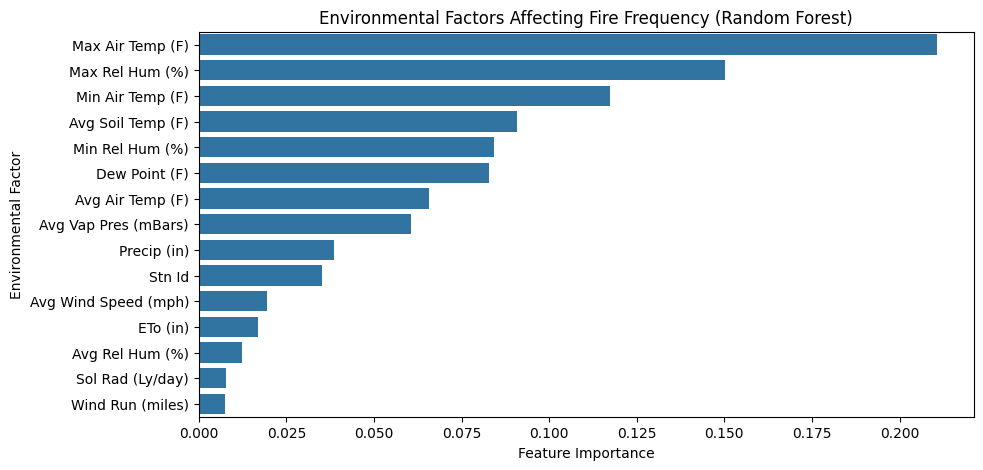

Random Forest R² Score: 0.39


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.metrics import r2_score

features = merged_df.drop(columns=['Year-Month', 'Fire Count'])
target = merged_df['Fire Count']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
feature_names = features.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

top_3_factors = feature_importance_df.head(3)['Feature'].tolist()
print(f"Top 3 Environmental Factors Affecting Fire Frequency: {top_3_factors}")

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'])
plt.xlabel("Feature Importance")
plt.ylabel("Environmental Factor")
plt.title("Environmental Factors Affecting Fire Frequency (Random Forest)")
plt.show()

y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest R² Score: {r2_rf:.2f}")

Then we could draw plots according to the top three factors that affect fire frequency and their trends.

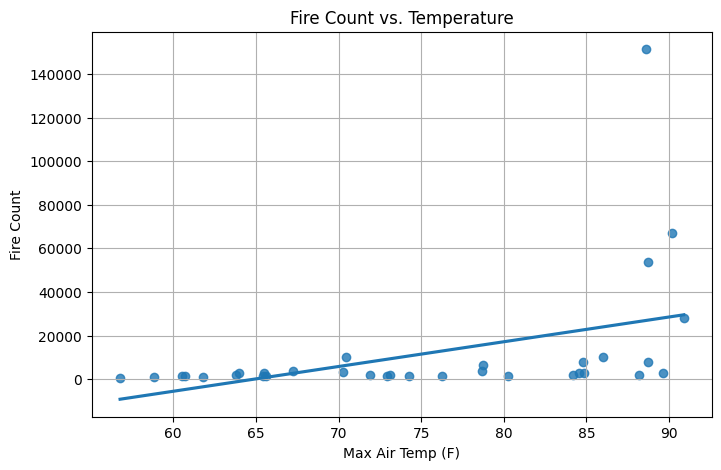

In [7]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Max Air Temp (F)', y='Fire Count', data=merged_df, scatter=True, ci=None, order=1)
plt.xlabel("Max Air Temp (F)")
plt.ylabel("Fire Count")
plt.title("Fire Count vs. Max Air Temp (F)")
plt.grid()
plt.show()

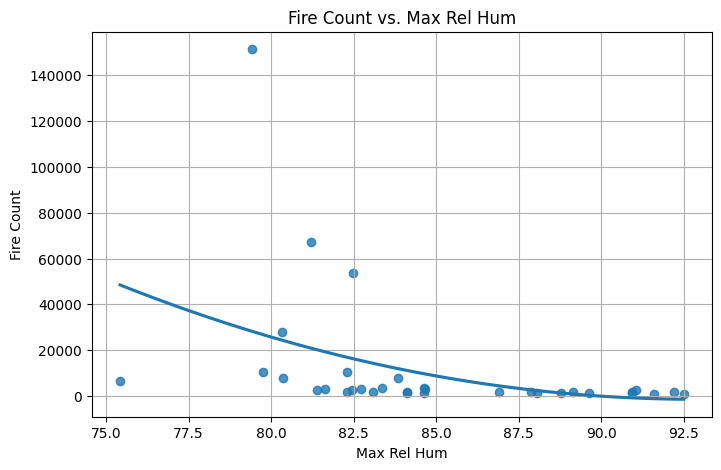

In [8]:
plt.figure(figsize=(8, 5))
sns.regplot(x=merged_df['Max Rel Hum (%)'], y=merged_df['Fire Count'], data=merged_df, scatter=True, ci=None, order=2)
plt.xlabel("Max Rel Hum")
plt.ylabel("Fire Count")
plt.title("Fire Count vs. Max Rel Hum")
plt.grid()
plt.show()


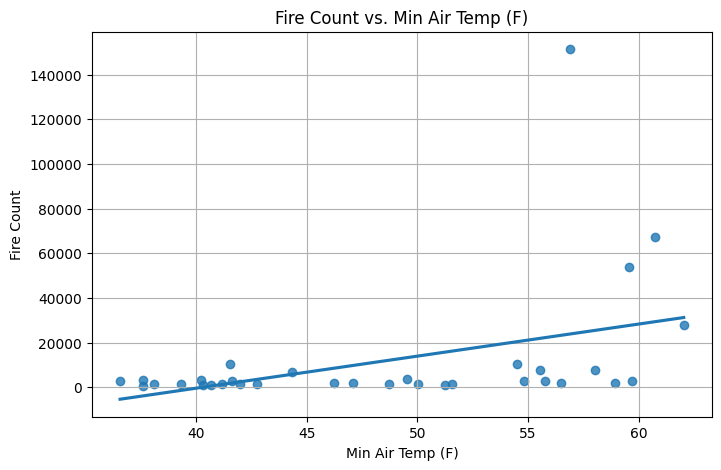

In [9]:
plt.figure(figsize=(8, 5))
sns.regplot(x=merged_df['Min Air Temp (F)'], y=merged_df['Fire Count'], data=merged_df, scatter=True, ci=None, order=1)
plt.xlabel("Min Air Temp (F)")
plt.ylabel("Fire Count")
plt.title("Fire Count vs. Min Air Temp (F)")
plt.grid()
plt.show()


We can also perform SHAP (SHapley Additive exPlanations) analysis on the random forest model because it will help you understand exactly how each factor contributes to fire frequency predictions, providing clearer insights than just feature importance scores.

/Users/yingxichen/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


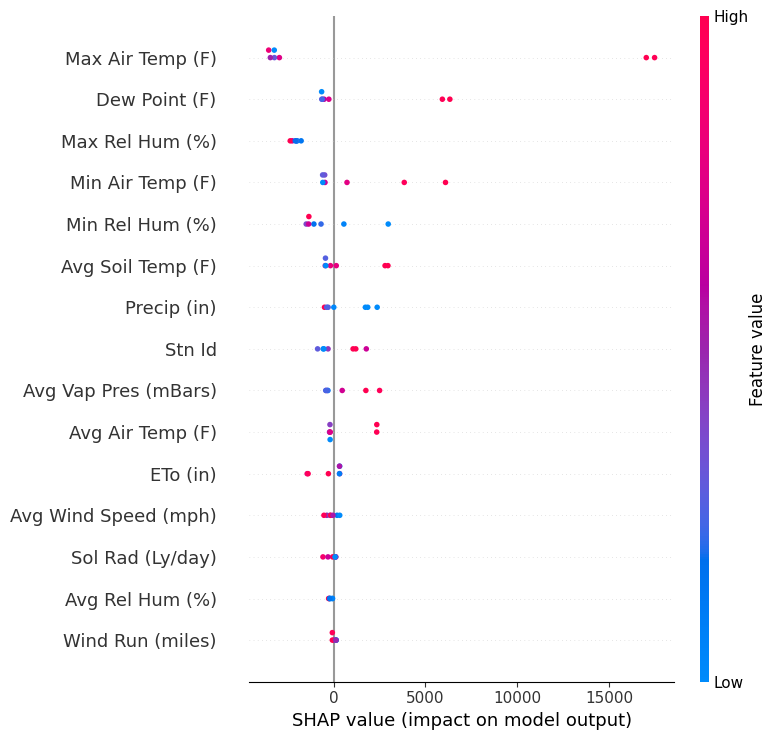

In [10]:
import shap

explainer = shap.Explainer(rf_model, X_train)
shap_values = explainer(X_test)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test)

We found that dew point also has influence on the fire frequency according to the plot. So we can add a figure here. 

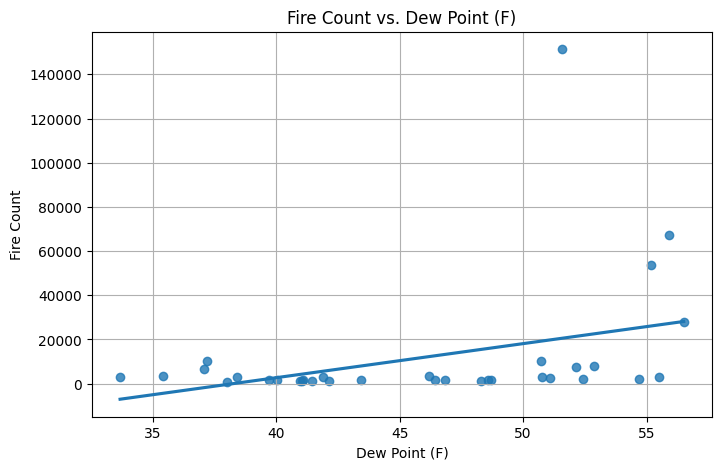

In [11]:
plt.figure(figsize=(8, 5))
sns.regplot(x=merged_df['Dew Point (F)'], y=merged_df['Fire Count'], data=merged_df, scatter=True, ci=None, order=1)
plt.xlabel("Dew Point (F)")
plt.ylabel("Fire Count")
plt.title("Fire Count vs. Dew Point (F)")
plt.grid()
plt.show()
